In [2]:
# Standard imports
import cv2
import numpy as np;
 
import matplotlib.pyplot as plt
cv2.useOptimized()
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 12)
dbgImgProcSteps=False
import time
import os
 

Populating the interactive namespace from numpy and matplotlib


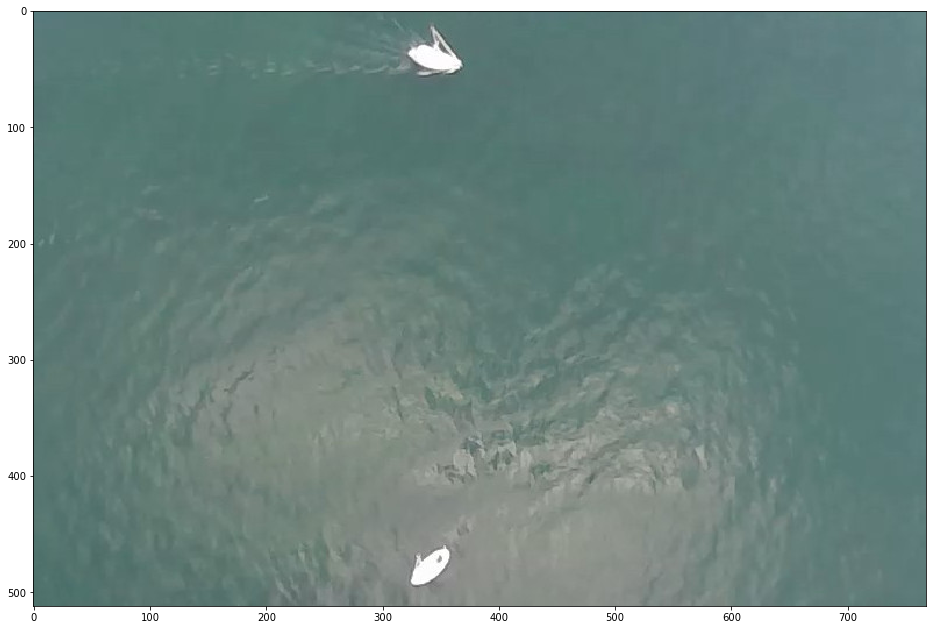

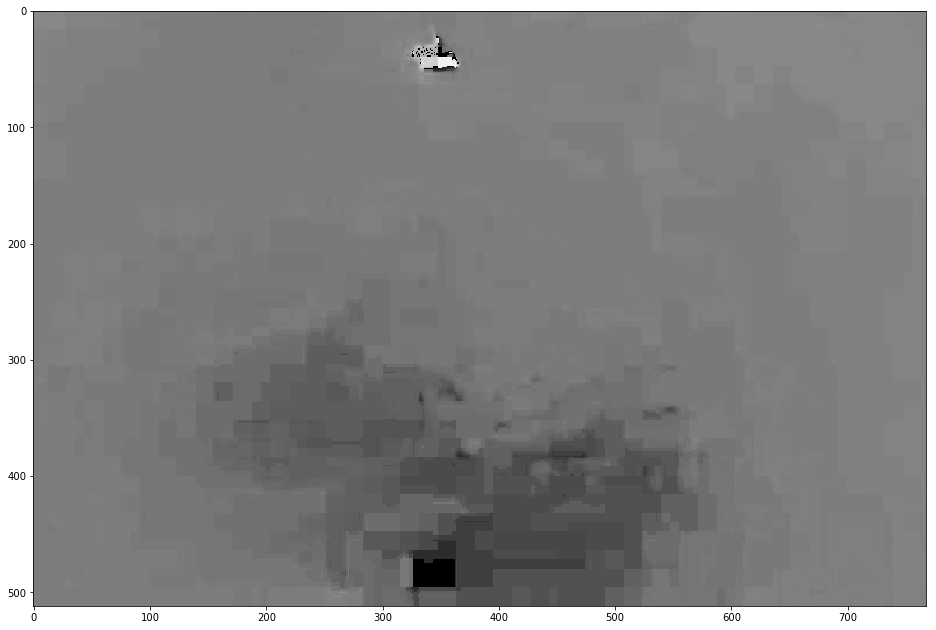

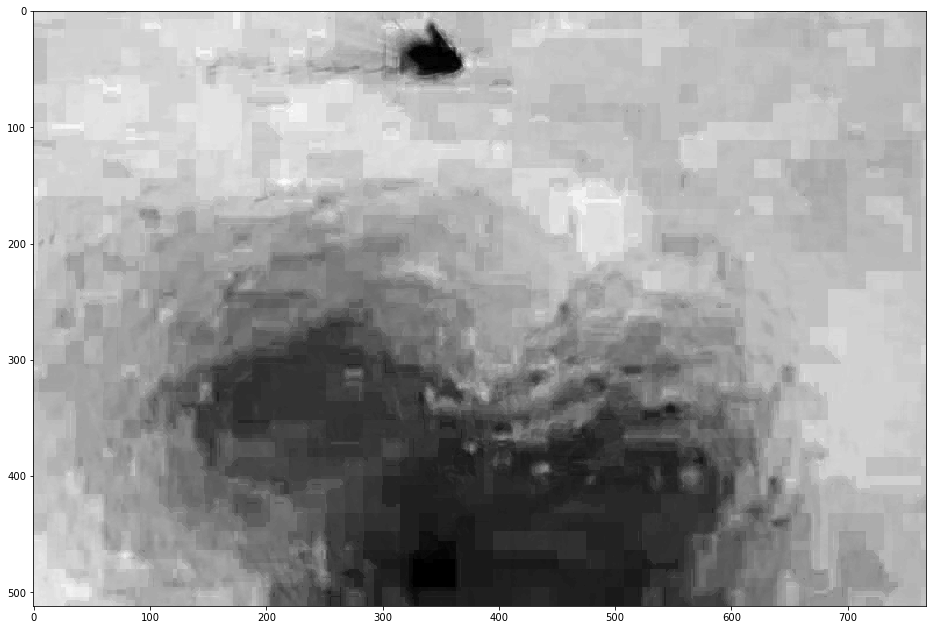

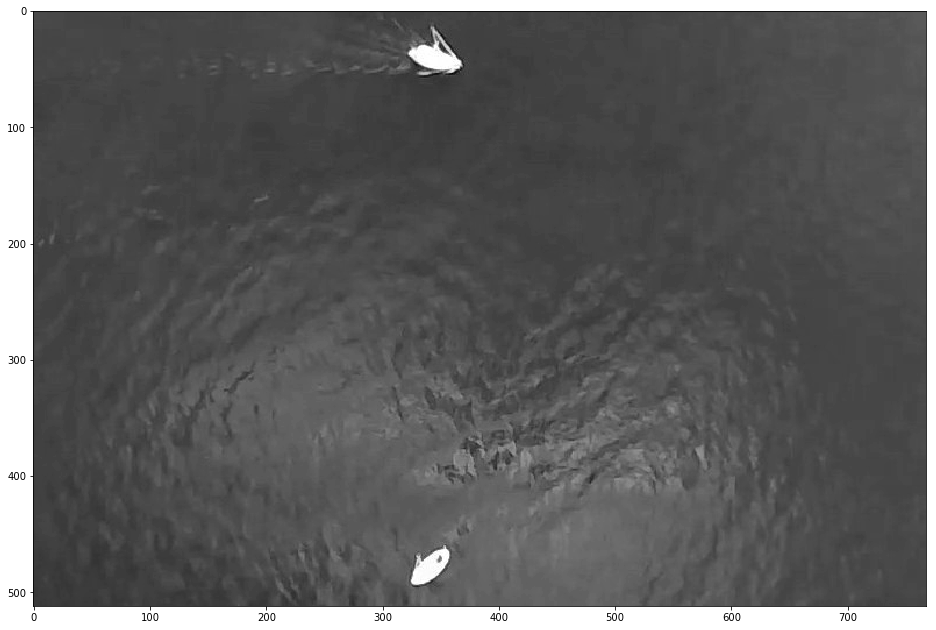

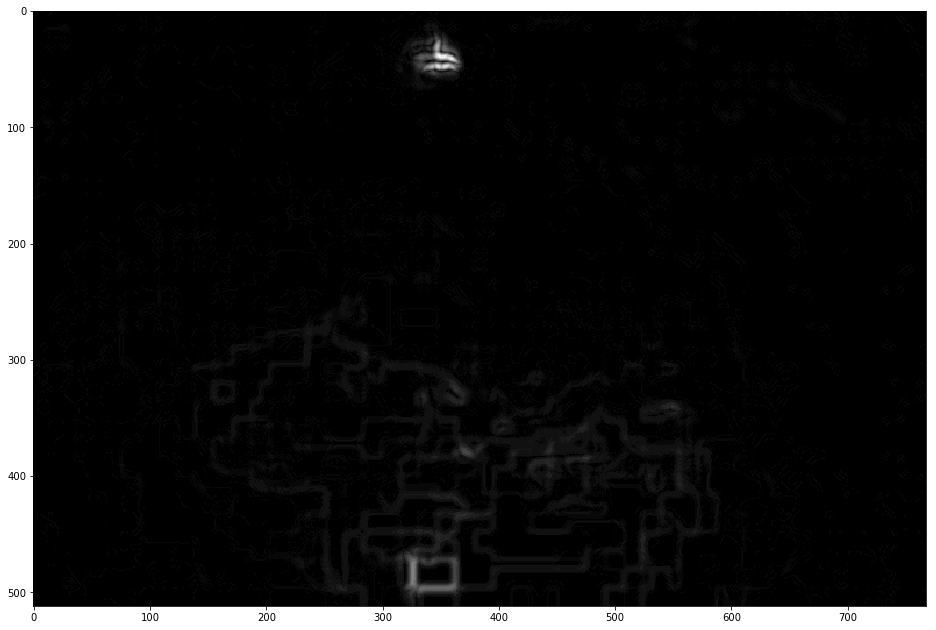

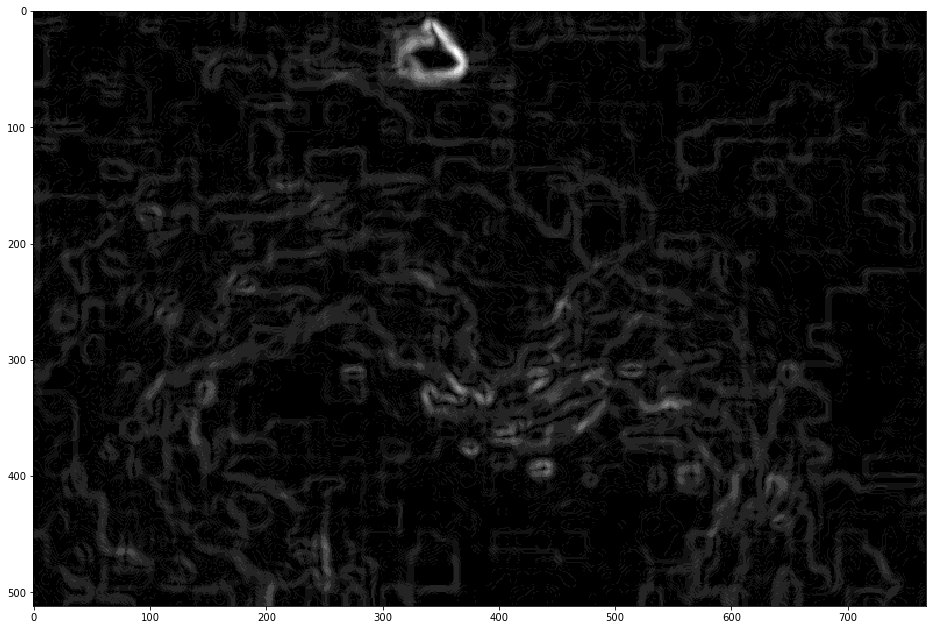

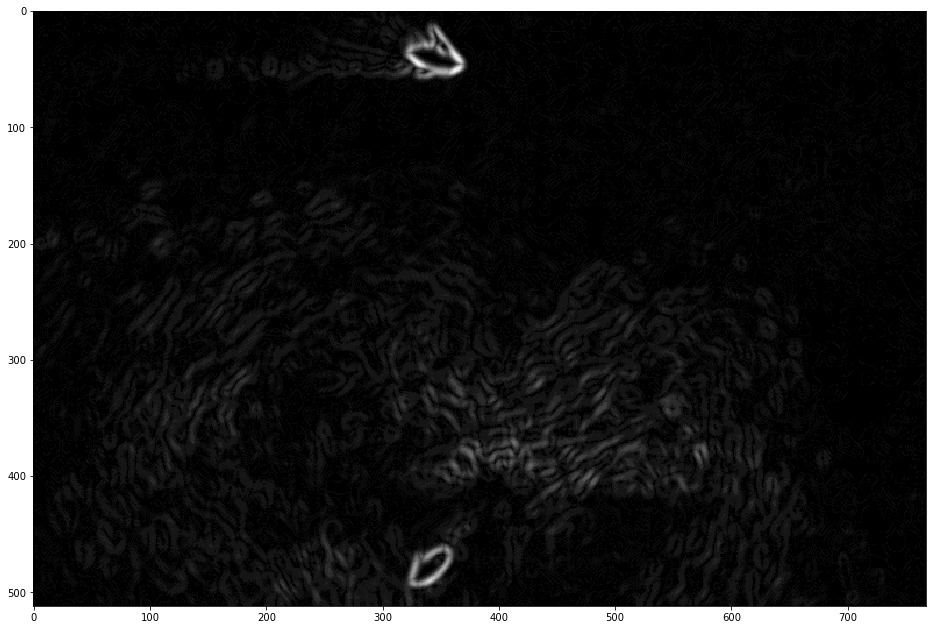

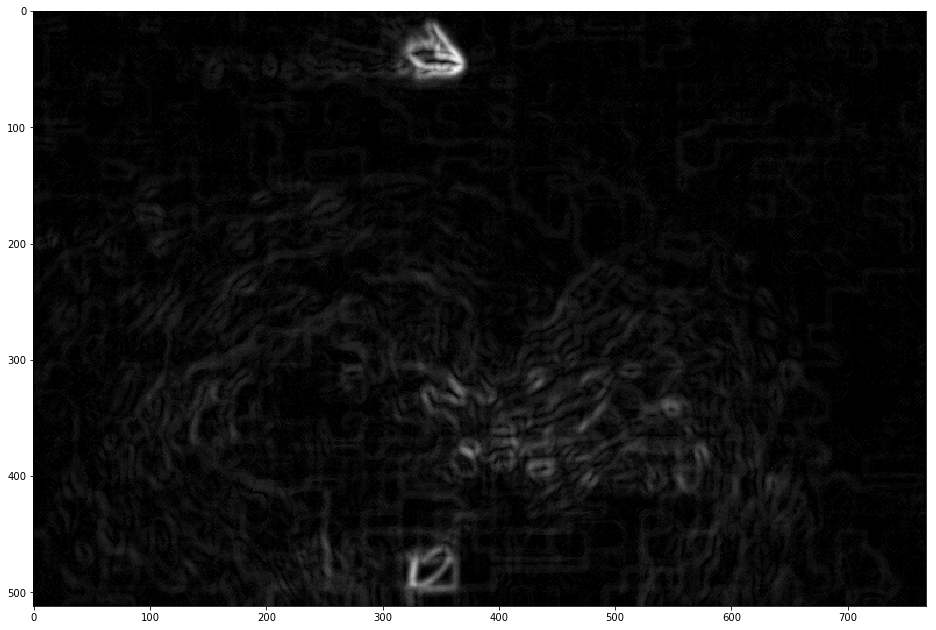

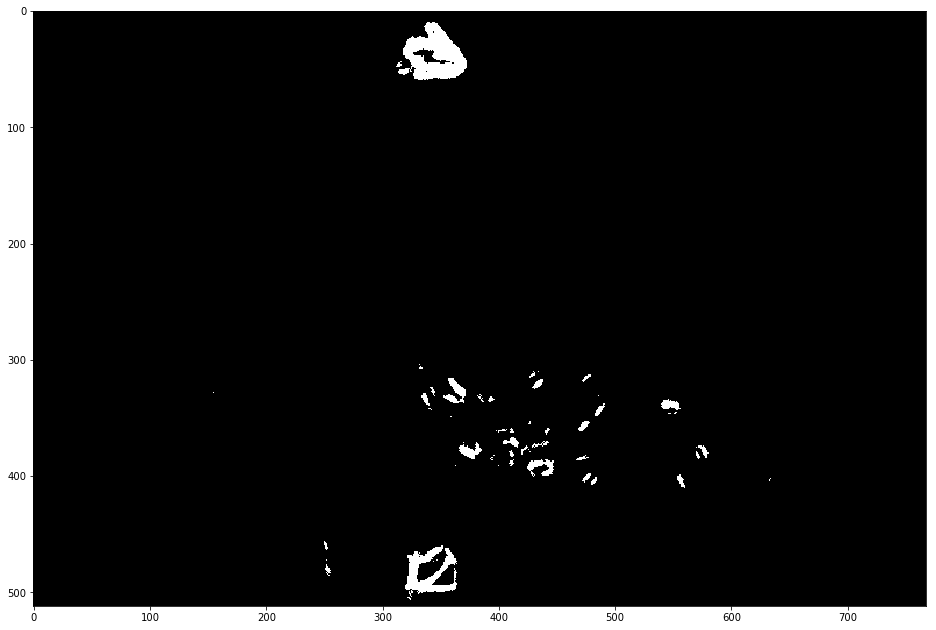

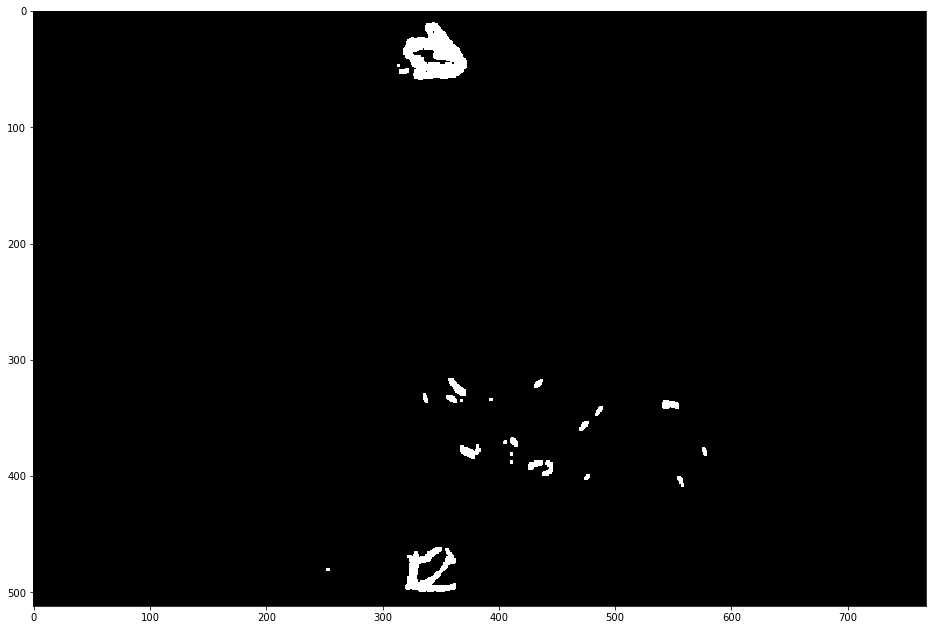

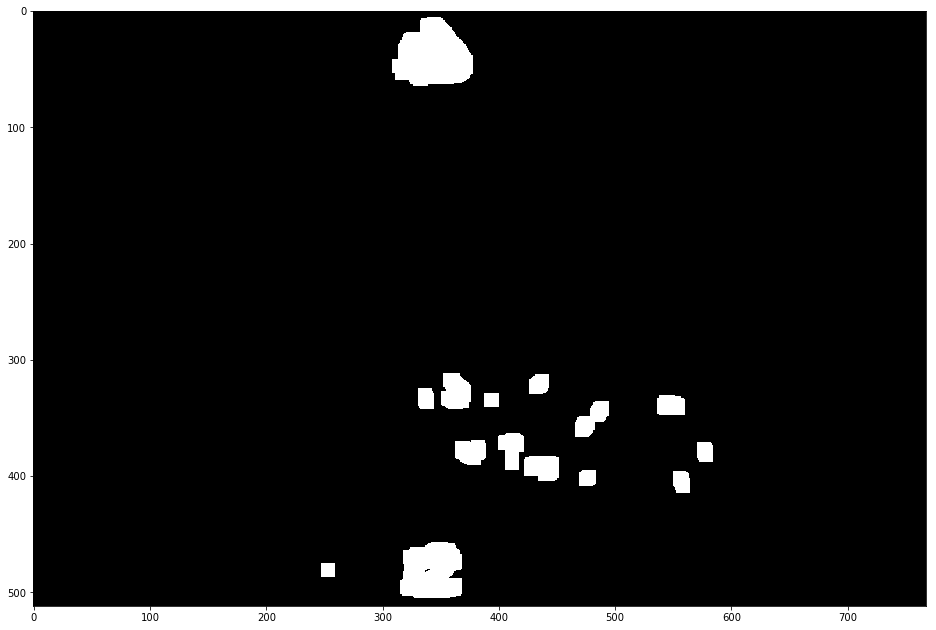

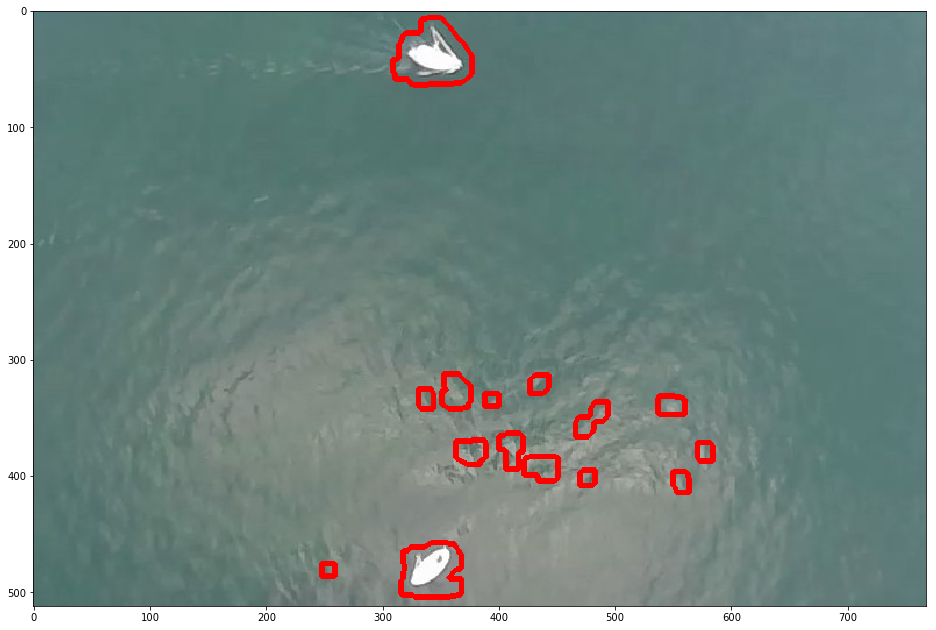

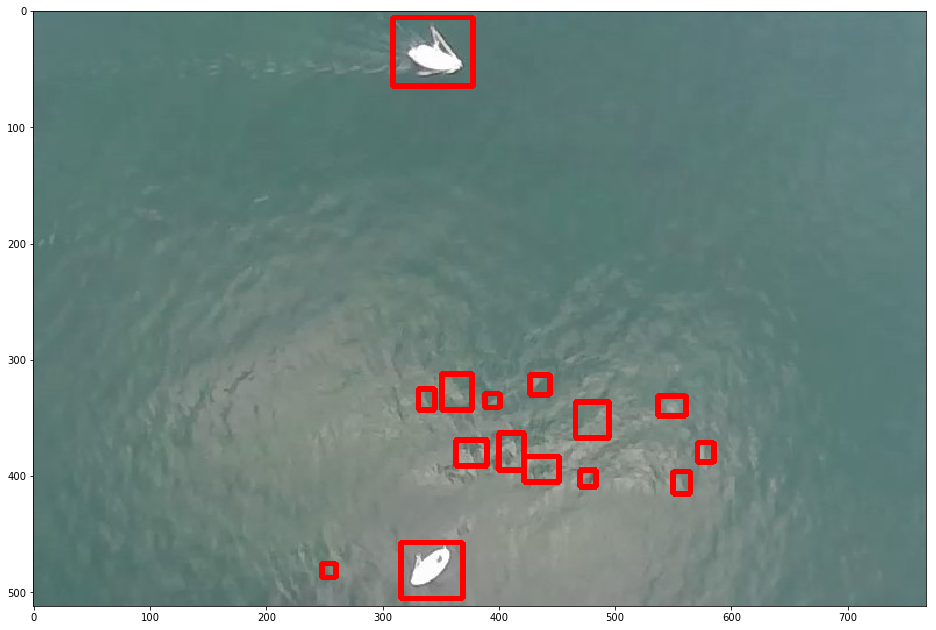

'\nimport nbimporter\nimport extractFeatures as roiDescriptor\nbbGroundTruthPath=os.path.splitext(onePicPath)[0]+".xml"\nbbBoatGT=roiDescriptor.getBoatROIsFromFile(bbGroundTruthPath)\n\nret=testDetectionIoUPerf(boundingBoxes,bbBoatGT,img_hsv.shape)\n'

In [22]:
import roiDetector

#show_step=["split_pic","Add_Pics", "calc_grad_pic", "gauss_blur_pic","morph_pic","denoise_pic","percentile_threshold_Pic","getBoundingBoxesFromContours"]
show_step=["calc_grad_pic","gauss_blur_pic","percentile_threshold_Pic","getBoundingBoxesFromContours","morph_pic"]
dbgImgProcSteps=True

#onePicPath= "/home/julle/ControlerProjekte/SearchWing/Data/images/Moonbird/MoonbirdDatasetSmaller/IMG_4097.JPG"
onePicPath= "/home/julle/ControlerProjekte/SearchWing/Data/image111.jpg"

#maskSavePath = os.path.split(onePicPath)[0]+"/filtermasks/"+os.path.split(onePicPath)[1]+".png"
onePic=roiDescriptor.load_pic(onePicPath)
#onePic=gaussian_pyramid_pic_down(onePic,1)
plt.imshow(onePic,cmap="gray")
plt.show()  
#img_rgb = onePic
#img_rgb_r,img_rgb_g,img_rgb_b=split_pic(img_rgb)    

img_hsv = cv2.cvtColor(onePic, cv2.COLOR_RGB2HSV)
  
img_hsv_h,img_hsv_s,img_hsv_v=roiDescriptor.split_pic(img_hsv)
plt.imshow(img_hsv_h,cmap="gray")
plt.show()
plt.imshow(img_hsv_s,cmap="gray")
plt.show()
plt.imshow(img_hsv_v,cmap="gray")
plt.show()
#process
gradMode="sobel"
gradSize=1
gaussBlurKernelSize=15
gausssigmaSize=0 # 0=>sigma wird berechnet das summe im kernel == 1 ist
gradients_a=roiDescriptor.imgProcess2Gradients(img_hsv_h,180,gradMode=gradMode,gradSize=gradSize,
                                 gaussKernelSize=gaussBlurKernelSize,gausssigmaSize=gausssigmaSize)
gradients_b=roiDescriptor.imgProcess2Gradients(img_hsv_s,256,gradMode=gradMode,gradSize=gradSize,
                                 gaussKernelSize=gaussBlurKernelSize,gausssigmaSize=gausssigmaSize) # für dunkle bilder  
gradients_c=roiDescriptor.imgProcess2Gradients(img_hsv_v,256,gradMode=gradMode,gradSize=gradSize,
                                 gaussKernelSize=gaussBlurKernelSize,gausssigmaSize=gausssigmaSize)    
plt.imshow(gradients_a,cmap="gray")
plt.show()  
plt.imshow(gradients_b,cmap="gray")
plt.show()  
plt.imshow(gradients_c,cmap="gray")
plt.show()  

gradients_combined=roiDescriptor.Add_Pics(gradients_a,gradients_b)
asd=roiDescriptor.Add_Pics(gradients_combined,gradients_c)
plt.imshow(asd,cmap="gray")
plt.show()  
#write_pic(asd,"/home/julle/ControlerProjekte/SearchWing/Data/FFTTest.png")
img_threshed = roiDescriptor.percentile_threshold_Pic(asd,99)
plt.imshow(img_threshed,cmap="gray")
plt.show()  
###>>>> img_threshed abspeichern für maskendescriptor
#img_threshed = denoise_pic(img_threshed,kernelsize=2,iterations=1)

img_threshed = roiDescriptor.morph_pic(img_threshed,3,cv2.MORPH_OPEN) # pixelgruppen löschen die kleiner 2 pixel sind
plt.imshow(img_threshed,cmap="gray")
plt.show()  
img_dilated = roiDescriptor.dilate_pic(img_threshed,10)
plt.imshow(img_dilated,cmap="gray")
plt.show()  

contours = roiDescriptor.getContors_pic(img_dilated)
onePicCpy = onePic.copy()
cv2.drawContours(onePicCpy, contours, -1, (255, 0, 0), 3)
plt.imshow(onePicCpy,cmap="gray")
plt.show()   
  

onePicCpy =onePic.copy()
boundingBoxes = roiDescriptor.getBoundingBoxesFromContours(contours)
bbImg= roiDescriptor.drawBoundingBoxesToImg(onePicCpy,boundingBoxes)
plt.imshow(bbImg,cmap="gray")
plt.show()  

"""
import nbimporter
import extractFeatures as roiDescriptor
bbGroundTruthPath=os.path.splitext(onePicPath)[0]+".xml"
bbBoatGT=roiDescriptor.getBoatROIsFromFile(bbGroundTruthPath)

ret=testDetectionIoUPerf(boundingBoxes,bbBoatGT,img_hsv.shape)
"""
#export2xml(boundingBoxes,onePicPath,onePic)

#end = time.time()
#print("Processingdauer [sek]:",end - start)
#RoiImages = getRectRoiImages(boundingBoxes,onePic)



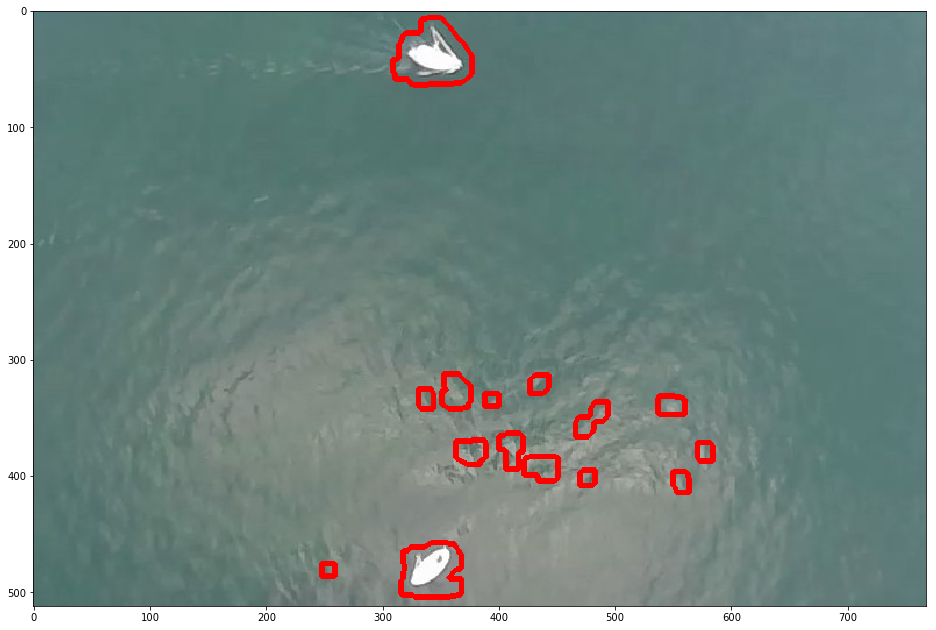

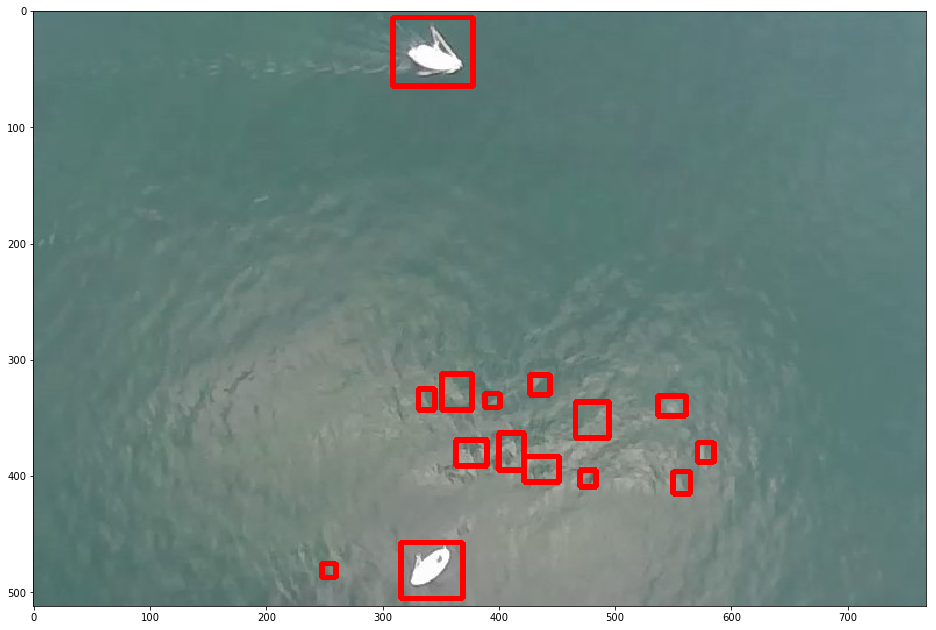